<a href="https://colab.research.google.com/github/ua-datalab/MLWorkshops/blob/main/Overview_ML_Algorithms/OverviewMLAlgorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## DSF Fall 2022

### Challenge 1: Regression Linear Model

Posted: 11/15/2022

We used the [linear_model.LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html?highlight=linear_model) model (same as the Ordinary Least Squares Method Linear Fit), to fit a linear modelto the diabetes dataset inclyded in the Scikit-Learn Library.

There is a large collection of different types of Regression Algorithms included in the [sklearn.linear_model](https://scikit-learn.org/stable/modules/classes.html?highlight=linear_model#module-sklearn.linear_model).

We are now interested in comparing the standard LinearRegression Algorithm with the following set of [Robust Regressors](https://en.wikipedia.org/wiki/Robust_regression):
* [HubberRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.HuberRegressor.html#sklearn.linear_model.HuberRegressor)
* [RANSACRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RANSACRegressor.html#sklearn.linear_model.RANSACRegressor)
* [TheilSenRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.TheilSenRegressor.html#sklearn.linear_model.TheilSenRegressor)

Robust Regressors perform better when data outliers are present.

Please run the additional set of Robust Regression Algorithms and perform a comparison between the [regression metrics](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics) for each case.

Comment on the results of your observations.

Once you accomplish this task, please save a copy of your Jupyter Notebook in your Github DSF Weekly Journals.


## An Overview of Machine Learning Algorithms

Created: 11/15/2022

We will use Python's Machine Learning  [Scikit-Learn Library](https://scikit-learn.org/stable/index.html), in particular the [LinearRegression model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html?highlight=linearregression#sklearn.linear_model.LinearRegression).

## Linear Regression

In [ ]:
import matplotlib.pylab as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn import datasets

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Linear Regression Example

We will use the [diabetes dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html) included in Scikit-Learn.

In [ ]:
diabetes=datasets.load_diabetes() # Load dataset
X, y = diabetes.data, diabetes.target
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [ ]:
diabetes.data.shape # feature matrix shape

(442, 10)

In [ ]:
diabetes.target.shape # target vector shape

(442,)

In [ ]:
diabetes.feature_names # column names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


### Linear Regression Model

Linear Regression assumes the following model:

$y = Xβ + c + ϵ$

where:

$X$ is the data, $β$ are the coefficients,
$c$ is the intercept, $ϵ$ is an error that cannot be explained by model, $y$ is the target.

Using scikit-learn, linear regression is very easy:

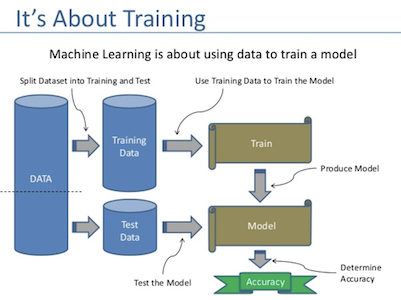

In [ ]:
# Seperate train and test data (4 groups)
# Will set 20% of the data for testing the model, and a random_state is set for reproducibility.
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target,
                                                    test_size=0.2, random_state=0)

# There are three steps to model something with sklearn

# 1. Set up the model
model = LinearRegression()

# 2. Then train the model using fit
model.fit(X_train, y_train)

# 3. Check the performance score with unseen test data
model.score(X_test, y_test)


0.33222203269065176

You can extract model information:

In [ ]:
model.coef_ # Get the coefficients, beta (slopes)

array([ -35.55683674, -243.1692265 ,  562.75404632,  305.47203008,
       -662.78772128,  324.27527477,   24.78193291,  170.33056502,
        731.67810787,   43.02846824])

In [ ]:
model.intercept_ # Get the intercept, c

152.5381335195406

In [ ]:
model.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [ ]:
model.predict(X_test) # Predict unkown data

array([238.47145247, 248.93170646, 164.05404165, 120.30794355,
       187.42422054, 259.04865002, 113.55556372, 188.07597044,
       149.49663441, 236.01099949, 172.24629506, 178.88073764,
       109.15751983,  92.13508975, 243.33042043,  87.356971  ,
       155.72606406,  66.99073989, 100.42610442, 218.09422877,
       196.66287912, 161.29832968, 161.70779605, 156.52520454,
       197.88796516, 167.57984206, 120.74478913,  84.83879727,
       192.03728687, 160.60687024, 175.17178362,  84.22833237,
       145.7995542 , 145.97333493, 140.96488953, 197.00421108,
       165.94322494, 190.65906468, 128.22520508, 206.41941223,
        84.35851196, 164.0256504 , 144.1056776 , 184.68355549,
       177.80238966,  74.32855231, 143.3660286 , 138.67726085,
       120.81146113, 234.34252077, 161.94390244,  74.5455476 ,
       154.71905074, 156.78884927, 237.42227096, 174.23053048,
       190.88212635, 118.98373473, 132.20418974, 168.52674824,
       214.74245466, 171.42364091, 157.37409906, 108.86


We can plot the prediction y_pred versus original y_test

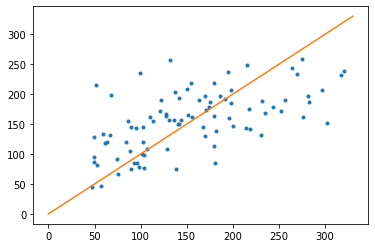

In [ ]:
# plot prediction and actual data
y_pred = model.predict(X_test)
plt.plot(y_test, y_pred, '.')

# plot a line, a perfect prediction would all fall on this line
# np.linspace is a linear array of 100 values between 0 and 330
x = np.linspace(0, 330, 100)
y = x
plt.plot(x, y)
plt.show()



We now extract some known [Linear Regression metrics](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics) information.



In [ ]:
# The coefficients
print("Coefficients: \n", model.coef_)

# Mean Absolute Error (MAE)
print("Mean Absolute Error (MAE): %.2f" % mean_absolute_error(y_test, y_pred))

# The mean squared error
print("Mean Squared Error: %.2f" % mean_squared_error(y_test, y_pred))

# Mean Absolute Percent Error
print("Mean Absolute Percent Error: %.2f" % mean_absolute_percentage_error(y_test, y_pred))

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))


Coefficients: 
 [ -35.55683674 -243.1692265   562.75404632  305.47203008 -662.78772128
  324.27527477   24.78193291  170.33056502  731.67810787   43.02846824]
Mean Absolute Error (MAE): 46.17
Mean Squared Error: 3424.32
Mean Absolute Percent Error: 0.38
Coefficient of determination: 0.33


## Logistic Regression Classifier



In [ ]:
# Load all necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, auc
from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
# Read Titanic dataset
filename = "https://raw.githubusercontent.com/clizarraga-UAD7/Datasets/main/titanic/titanic3.csv"
df0 = pd.read_csv(filename)

df0.head()


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [ ]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


Will drop some columns.

In [ ]:
#drop boat, body, home.dest columns from DataFrame
cols = [11, 12, 13]
df0.drop(df0.columns[cols], axis=1, inplace=True)
df0.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   float64
 1   survived  1309 non-null   float64
 2   name      1309 non-null   object 
 3   sex       1309 non-null   object 
 4   age       1046 non-null   float64
 5   sibsp     1309 non-null   float64
 6   parch     1309 non-null   float64
 7   ticket    1309 non-null   object 
 8   fare      1308 non-null   float64
 9   cabin     295 non-null    object 
 10  embarked  1307 non-null   object 
dtypes: float64(6), object(5)
memory usage: 112.7+ KB


Let us briefly describe each variable:

**Pclass**: The class the passenger was in on the ship (1, 2 or 3);

**Survived**: The target variable; whether the person survived the shipwreck (1) or did not survive the shipwreck (0);

**Name**: The name of the passenger;

**Sex**: The gender of the passenger;

**Age**: The age of the passenger;

**SibSp**: Number of siblings and spouses on the ship;

**Parch**: Number of parents / children on the ship;

**Ticket**: Number of the ticket;

**Fare**: The fare of the ticket;

**Cabin**: Number of the cabin;

**Embarked**: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southhampton).


###Data pre-processing

1. Drop columns (Features) that do not any value to the model.

In [ ]:
# Drop unnecesary columns
df1=df0.drop(['name', 'ticket', 'cabin'], axis=1)
df1.head()


,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1.0,1.0,female,29.0000,0.0,0.0,211.3375,S
1,1.0,1.0,male,0.9167,1.0,2.0,151.5500,S
2,1.0,0.0,female,2.0000,1.0,2.0,151.5500,S
3,1.0,0.0,male,30.0000,1.0,2.0,151.5500,S
4,1.0,0.0,female,25.0000,1.0,2.0,151.5500,S


2. Create categorical dummies for the embarkment ports

Will use Pandas [pd.get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) to convert categorical variable into dummy/indicator variables.


In [ ]:
# Change Categorical dummy variables for the embarkment ports

ports = pd.get_dummies(df1.embarked, prefix='port')
ports.head()


,port_C,port_Q,port_S
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


Next we will join the port dataframe to df1.
(Please see all [possible ways to join, merge, concatenate and compare dataframes](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html)).  

In [ ]:
# Replace 'embarked' with ports variables and drop column.
df2 = df1.join(ports)
df2.drop(['embarked'], axis=1, inplace=True)
df2.head()


,pclass,survived,sex,age,sibsp,parch,fare,port_C,port_Q,port_S
0,1.0,1.0,female,29.0000,0.0,0.0,211.3375,0,0,1
1,1.0,1.0,male,0.9167,1.0,2.0,151.5500,0,0,1
2,1.0,0.0,female,2.0000,1.0,2.0,151.5500,0,0,1
3,1.0,0.0,male,30.0000,1.0,2.0,151.5500,0,0,1
4,1.0,0.0,female,25.0000,1.0,2.0,151.5500,0,0,1


3. Transform gender names into binary numbers, using a dictionary.


Create a value map: male=0, female=1

In [ ]:
df2.sex = df2.sex.map({'male': 0, 'female': 1})
df2.head()


,pclass,survived,sex,age,sibsp,parch,fare,port_C,port_Q,port_S
0,1.0,1.0,1.0,29.0000,0.0,0.0,211.3375,0,0,1
1,1.0,1.0,0.0,0.9167,1.0,2.0,151.5500,0,0,1
2,1.0,0.0,1.0,2.0000,1.0,2.0,151.5500,0,0,1
3,1.0,0.0,0.0,30.0000,1.0,2.0,151.5500,0,0,1
4,1.0,0.0,1.0,25.0000,1.0,2.0,151.5500,0,0,1


4. Replace missing values

In [ ]:
df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   float64
 1   survived  1309 non-null   float64
 2   sex       1309 non-null   float64
 3   age       1046 non-null   float64
 4   sibsp     1309 non-null   float64
 5   parch     1309 non-null   float64
 6   fare      1308 non-null   float64
 7   port_C    1310 non-null   uint8  
 8   port_Q    1310 non-null   uint8  
 9   port_S    1310 non-null   uint8  
dtypes: float64(7), uint8(3)
memory usage: 75.6 KB


In [ ]:
df2[pd.isnull(df2).any(axis=1)]

,pclass,survived,sex,age,sibsp,parch,fare,port_C,port_Q,port_S
15,1.0,0.0,0.0,NaN,0.0,0.0,25.9250,0,0,1
37,1.0,1.0,0.0,NaN,0.0,0.0,26.5500,0,0,1
40,1.0,0.0,0.0,NaN,0.0,0.0,39.6000,1,0,0
46,1.0,0.0,0.0,NaN,0.0,0.0,31.0000,0,0,1
59,1.0,1.0,1.0,NaN,0.0,0.0,27.7208,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1297,3.0,0.0,0.0,NaN,0.0,0.0,7.2500,0,0,1
1302,3.0,0.0,0.0,NaN,0.0,0.0,7.2250,1,0,0
1303,3.0,0.0,0.0,NaN,0.0,0.0,14.4583,1,0,0
1305,3.0,0.0,1.0,NaN,1.0,0.0,14.4542,1,0,0


We can replace missing age with average value, using Pandas [df.fillna()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html) method.


In [ ]:
df2.age.fillna(df2.age.mean(), inplace=True)
df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   float64
 1   survived  1309 non-null   float64
 2   sex       1309 non-null   float64
 3   age       1310 non-null   float64
 4   sibsp     1309 non-null   float64
 5   parch     1309 non-null   float64
 6   fare      1308 non-null   float64
 7   port_C    1310 non-null   uint8  
 8   port_Q    1310 non-null   uint8  
 9   port_S    1310 non-null   uint8  
dtypes: float64(7), uint8(3)
memory usage: 75.6 KB


In [ ]:
# Eliminate any row with missing data at this point
df3 = df2.dropna()
df3.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1308 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1308 non-null   float64
 1   survived  1308 non-null   float64
 2   sex       1308 non-null   float64
 3   age       1308 non-null   float64
 4   sibsp     1308 non-null   float64
 5   parch     1308 non-null   float64
 6   fare      1308 non-null   float64
 7   port_C    1308 non-null   uint8  
 8   port_Q    1308 non-null   uint8  
 9   port_S    1308 non-null   uint8  
dtypes: float64(7), uint8(3)
memory usage: 85.6 KB


### Train Model

Split data: train + test

In [ ]:
df = df3.copy()


In [ ]:
# y will be the Target variable (Did Survive or not)
y = df.survived.copy()
X = df.drop(['survived'], axis=1)


In [ ]:
# Will reserve 20% of the data for testing the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [ ]:
X_train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1046 entries, 406 to 684
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pclass  1046 non-null   float64
 1   sex     1046 non-null   float64
 2   age     1046 non-null   float64
 3   sibsp   1046 non-null   float64
 4   parch   1046 non-null   float64
 5   fare    1046 non-null   float64
 6   port_C  1046 non-null   uint8  
 7   port_Q  1046 non-null   uint8  
 8   port_S  1046 non-null   uint8  
dtypes: float64(6), uint8(3)
memory usage: 60.3 KB


In [ ]:
X_train.head()

,pclass,sex,age,sibsp,parch,fare,port_C,port_Q,port_S
406,2.0,0.0,40.0,1.0,0.0,26.000,0,0,1
44,1.0,1.0,41.0,0.0,0.0,134.500,1,0,0
1235,3.0,0.0,74.0,0.0,0.0,7.775,0,0,1
785,3.0,1.0,22.0,1.0,0.0,13.900,0,0,1
794,3.0,1.0,5.0,0.0,0.0,12.475,0,0,1


## Logistic Regression Model

Define the [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logisticregression) model and train it with the X_train, y_train data

In [ ]:
model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=5000)

In [ ]:
p_predict = model.predict(X_test)

print("The accuracy is", round(accuracy_score(p_predict, y_test) * 100,2))


The accuracy is 79.77


## Model Performance Analysis

We'll use two measures:

* [Confusion Matrix](https://en.wikipedia.org/wiki/Confusion_matrix)
* Classification Report with [Precision, Recall](https://en.wikipedia.org/wiki/Precision_and_recall) and [F1-Score](https://en.wikipedia.org/wiki/F-score).

The confusion matrix is a table that is used to show the number of correct and incorrect predictions on a classification problem when the real values of the Test Set are known. It is of the format

\begin{bmatrix}
TP & FP \\
FN & TN
\end{bmatrix}

where

|  |  |
| :-: | :-: |
| TP=TruePositive	| FP=FalsePositive |
| FN=FalseNegative	|  TN=TrueNegative |

Functions called:
* [pd.crosstab](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html).Pandas compute a simple cross tabulation of two (or more) factors.
* [sklearn.metrics.classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html?highlight=classification_report#sklearn.metrics.classification_report). Builds a text report showing the main classification metrics.
* [sklearn.metrics.LinearRegression:   predict_proba](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=predict_proba#sklearn.linear_model.LogisticRegression.predict_proba). Probability estimates.
* [sklearn.metrics.roc_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html?highlight=roc_curve). Compute Receiver operating characteristic (ROC) curve.
* [sklearn.metrics.auc](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html?highlight=roc_curve). Computes Area Under the Curve (AUC) using the trapezoidal rule.

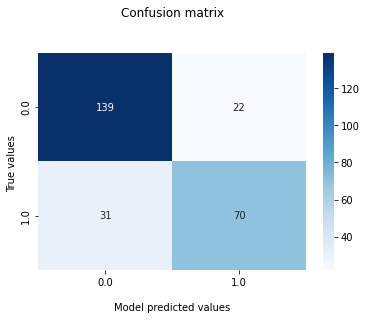

Classification Report
              precision    recall  f1-score   support

         0.0       0.82      0.86      0.84       161
         1.0       0.76      0.69      0.73       101

    accuracy                           0.80       262
   macro avg       0.79      0.78      0.78       262
weighted avg       0.80      0.80      0.80       262



In [ ]:

confusionMatrix = pd.crosstab(y_test, p_predict)
classificationReport = classification_report(y_test, p_predict)


fx = sns.heatmap(confusionMatrix, annot=True, cmap="Blues", fmt="d")
fx.set_title("Confusion matrix\n\n");
fx.set_xlabel("\nModel predicted values")
fx.set_ylabel("True values ")
plt.show()


print(f"Classification Report\n{classificationReport}")


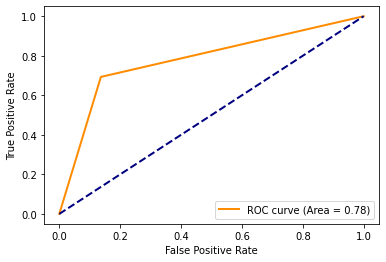

In [ ]:
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, p_predict)
area = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, color="darkorange", lw=2, label="ROC curve (Area = %0.2f)" % area,)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend(loc="lower right")
plt.show()


### Feature importance

It's possible to compute the dominance of each feature in the model.


In [ ]:
from matplotlib import pyplot
import numpy as np
# get importance
importance = model.coef_
# summarize feature importance
for j in range(0,importance.size):
	  #print('Feature: %0d, Score: %.5f' % (i,v))
    print(j, importance.item(j))


0 -0.929469994794104
1 2.493936454563933
2 -0.03762150400116515
3 -0.2775993752098934
4 -0.05677710512467664
5 0.0012450929782677667
6 0.21058934673973986
7 -0.11021782469890679
8 -0.39382157992275335


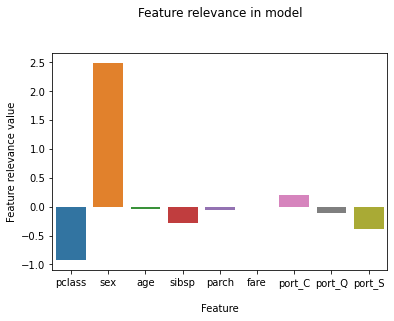

In [ ]:
# Will create 2 variables x,y to make barplot.

# The feature names are the column names of the X_train dataset
x = []
for i in X_train.columns:
    x.append(i)

ix = range(0, importance.size)
y = []
for i in ix:
    y.append(importance.item(i))

g = sns.barplot(x,y)
g.set_title("Feature relevance in model\n\n");
g.set_xlabel("\nFeature")
g.set_ylabel("Feature relevance value")

plt.show()
